### **Homework Assignment: Data Preprocessing for Machine Learning**

#### **Dataset**

Use the **California Housing Dataset** from Aurélien Géron's GitHub repo:

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/data/raw/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()


In [2]:
df = pd.read_csv(r"datasets\housing\housing\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## **Part 1: Exploratory Data Analysis (EDA)**

1. Display:

   * The first 10 rows.
   * Dataset info using `.info()`.
   * Summary statistics using `.describe()`.
   * Value counts for categorical columns (e.g., `ocean_proximity`).

2. Identify:

   * Columns with missing values.
   * Numerical vs categorical features.
   * Columns with unusual distributions or outliers.

---

## **Part 2: Handling Missing Values**

3. For missing data:

   * Drop any row or column if missing values are insignificant.
   * Use **median** imputation for `total_bedrooms`.

4. Create a `missing_report(df)` function that:

   * Returns a DataFrame: column name, count and percentage of missing values.

---

## **Part 3: Encoding Categorical Variables**

5. Encode the `ocean_proximity` column:

   * Use **One-Hot Encoding** via `pd.get_dummies()` or `OneHotEncoder`.

---

## **Part 4: Feature Scaling**

6. For numerical features:

   * Apply both **StandardScaler** and **MinMaxScaler** to features like:

     * `median_income`, `housing_median_age`, `population`, `median_house_value`
   * Plot feature histograms before and after scaling.

---

## **Part 5: Optional Feature Engineering**

7. Create meaningful new features:

   * `rooms_per_household = total_rooms / households`
   * `bedrooms_per_room = total_bedrooms / total_rooms`
   * `population_per_household = population / households`

1. Display:

   * The first 10 rows.
   * Dataset info using `.info()`.
   * Summary statistics using `.describe()`.
   * Value counts for categorical columns (e.g., `ocean_proximity`).

In [3]:
# The first 10 rows.
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
# Dataset info using `.info()`.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Summary statistics using `.describe()`.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Value count
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

2. Identify:

   * Columns with missing values.
   * Numerical vs categorical features.
   * Columns with unusual distributions or outliers.

In [7]:
#count missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# use ocean_proximity as a categorical variable
df['ocean_proximity'] = df['ocean_proximity'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


### Build box plot to find outliers

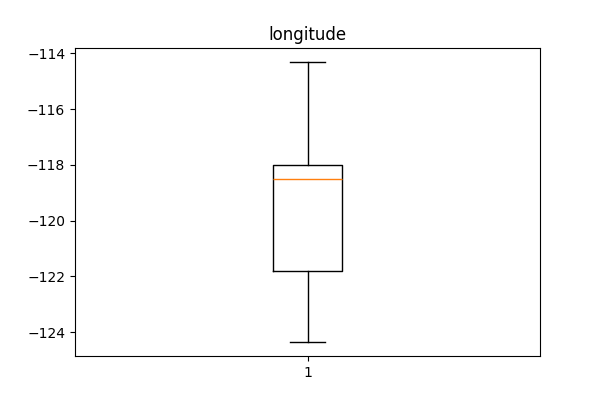

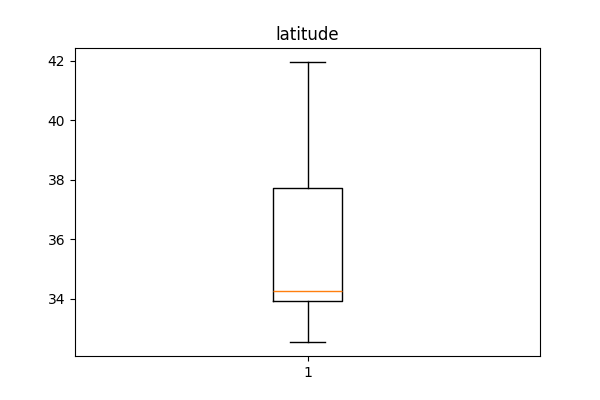

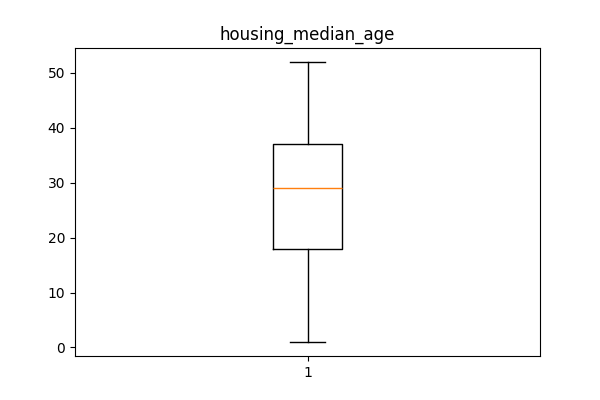

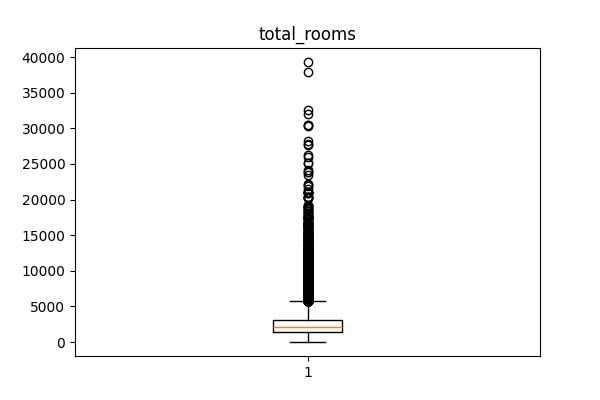

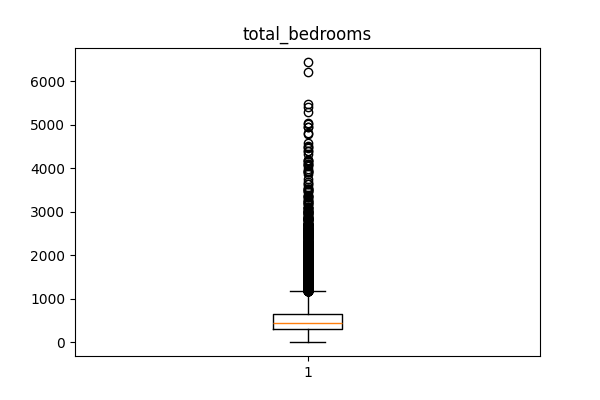

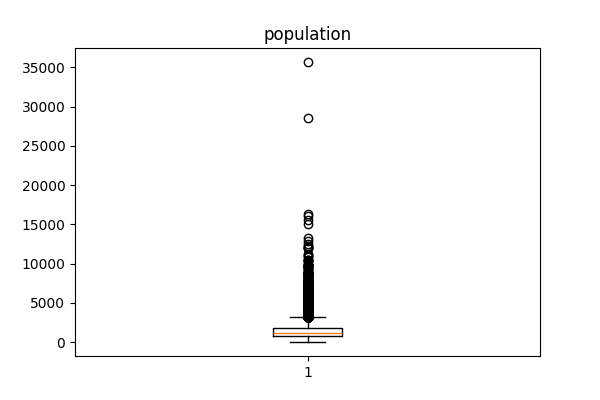

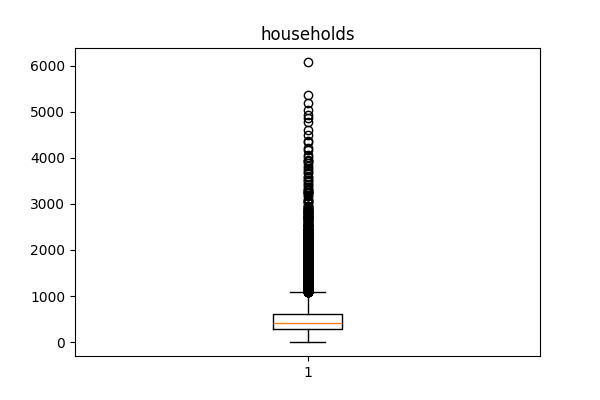

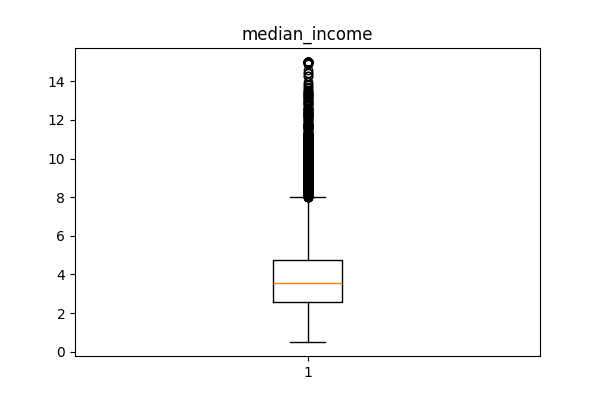

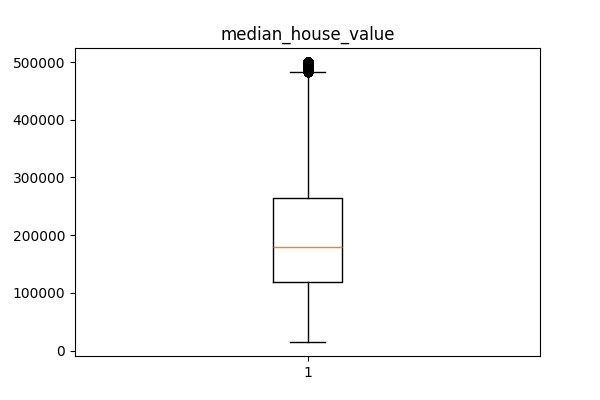

In [9]:
# Find outliers using boxplots
%matplotlib widget
import matplotlib.pyplot as plt


numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))        # Yangi figura har graph uchun
    plt.boxplot(df[col].dropna())    # Missing qiymatlar o'chiriladi
    plt.title(col)
    plt.show()


### Build histogram with log to check outliers

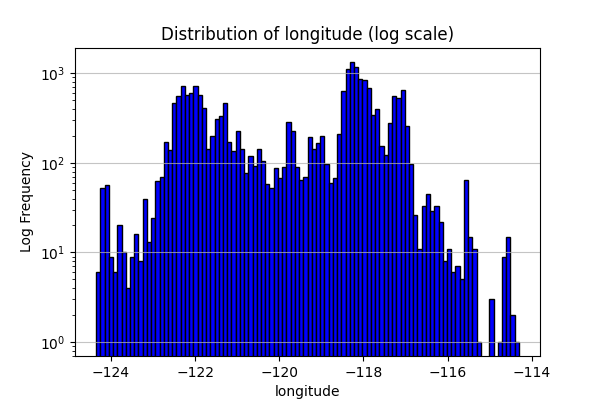

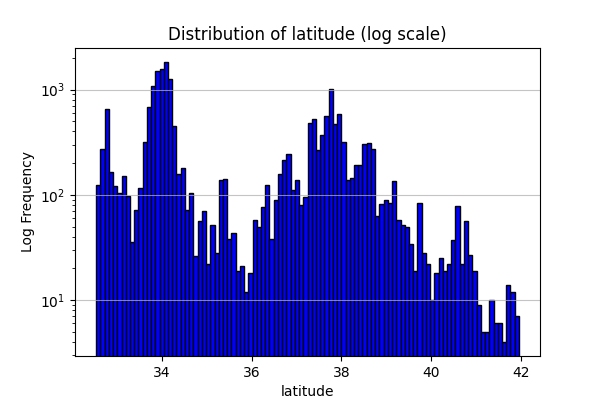

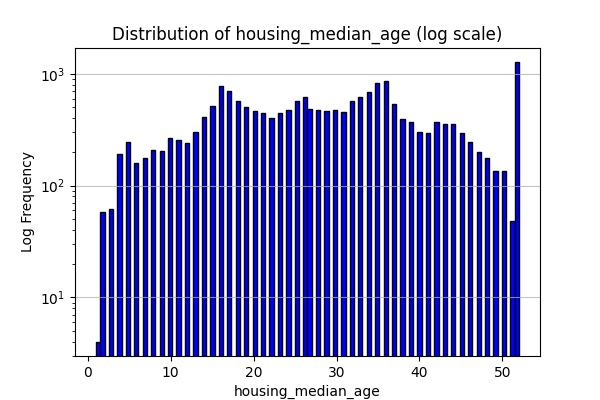

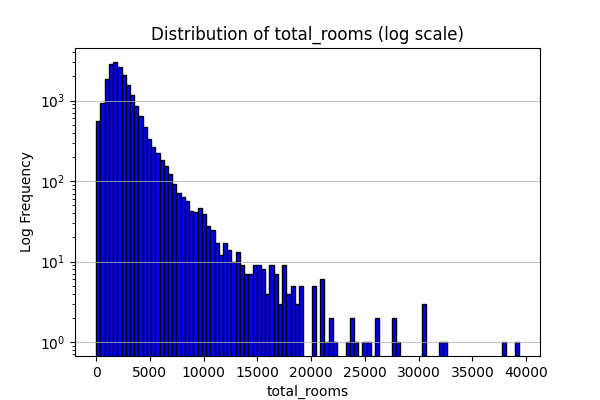

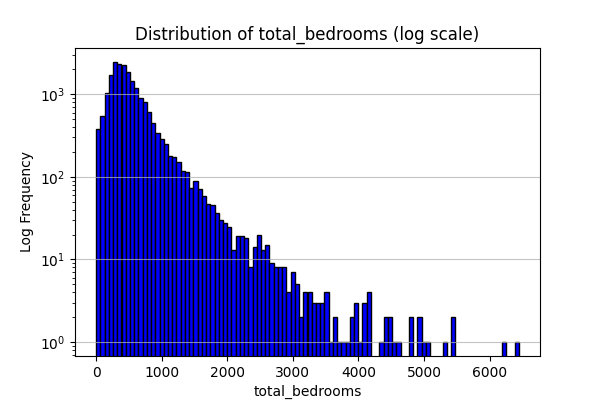

C:\Users\Builder\AppData\Local\Temp\ipykernel_4740\3783068158.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,4))        # Yangi figura har graph uchun


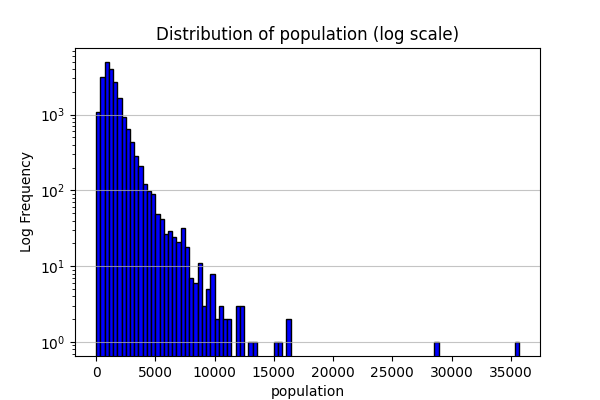

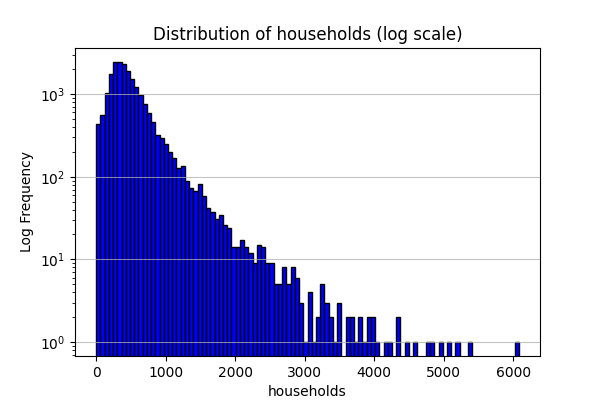

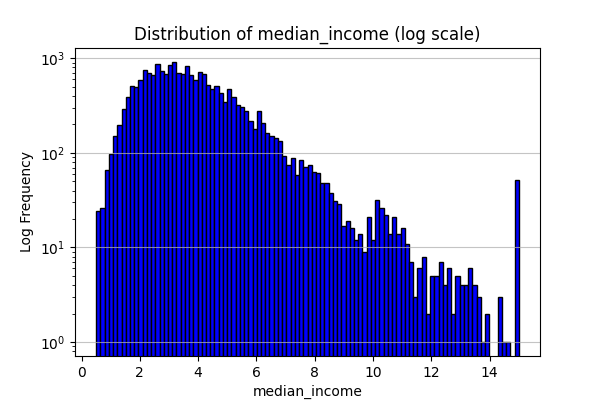

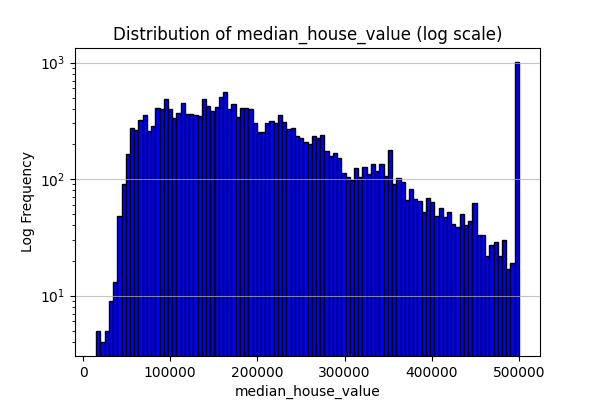

In [25]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))        # Yangi figura har graph uchun
    plt.hist(df[col].dropna(), bins=100, color='blue', edgecolor='black', log=True)
    plt.title(f'Distribution of {col} (log scale)')
    plt.xlabel(col)
    plt.ylabel('Log Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


## **Part 2: Handling Missing Values**

3. For missing data:

   * Drop any row or column if missing values are insignificant.
   * Use **median** imputation for `total_bedrooms`.

4. Create a `missing_report(df)` function that:

   * Returns a DataFrame: column name, count and percentage of missing values.

**filling outlies**

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np

# Faqat raqamli ustunlarni olish (NaN lar faqat shu yerda bo‘lishi mumkin)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# SimpleImputer obyektini yaratamiz, strategiya sifatida 'median'ni belgilaymiz
imputer = SimpleImputer(strategy='median')

# NaN qiymatlarni median bilan to‘ldiramiz (fit_transform o‘zida fit va transformni bajaradi)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Natijani tekshirish
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB
None


4. Create a `missing_report(df)` function that:

   * Returns a DataFrame: column name, count and percentage of missing values.

In [27]:
def missing_report(df):
    return df.isna().sum()/len(df)

missing_report(df)

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

## **Part 4: Feature Scaling**

6. For numerical features:

   * Apply both **StandardScaler** and **MinMaxScaler** to features like:

     * `median_income`, `housing_median_age`, `population`, `median_house_value`
   * Plot feature histograms before and after scaling.

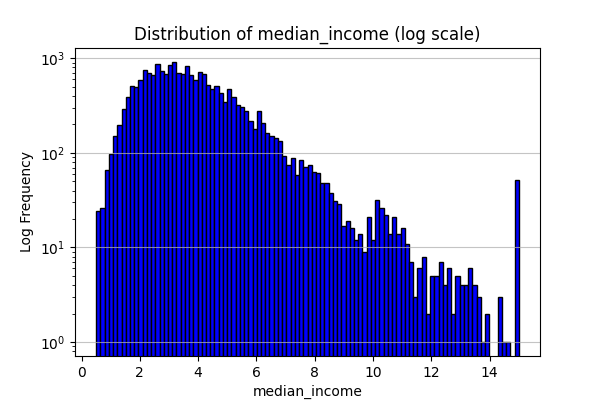

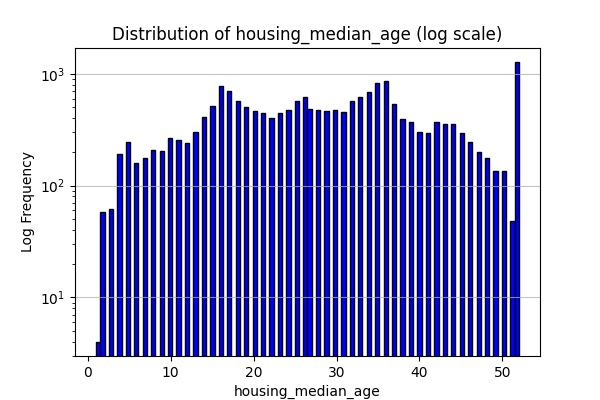

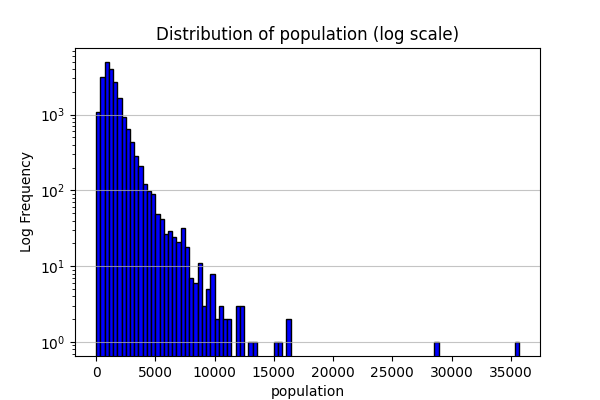

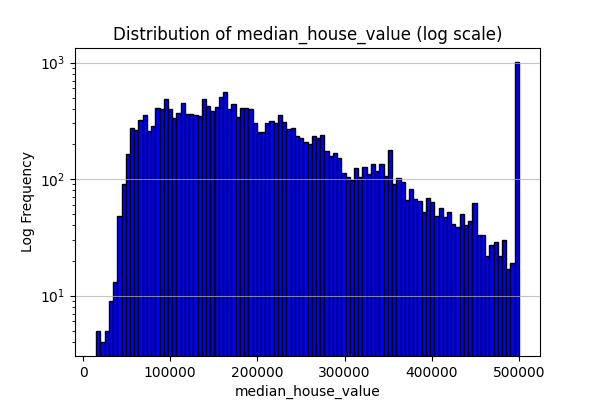

In [29]:
cols = ['median_income', 'housing_median_age', 'population', 'median_house_value']
for col in cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=100, color='blue', edgecolor='black', log=True)
    plt.title(f'Distribution of {col} (log scale)')
    plt.xlabel(col)
    plt.ylabel('Log Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### standartization

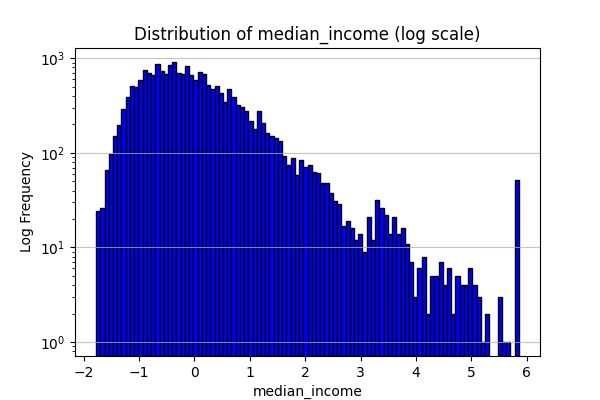

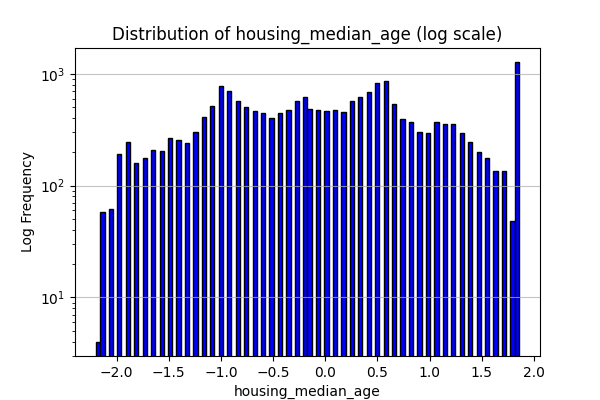

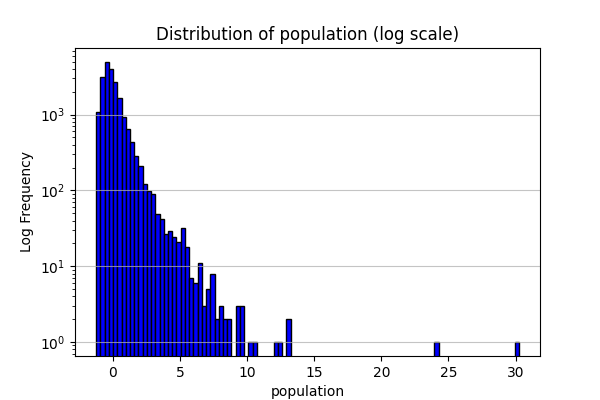

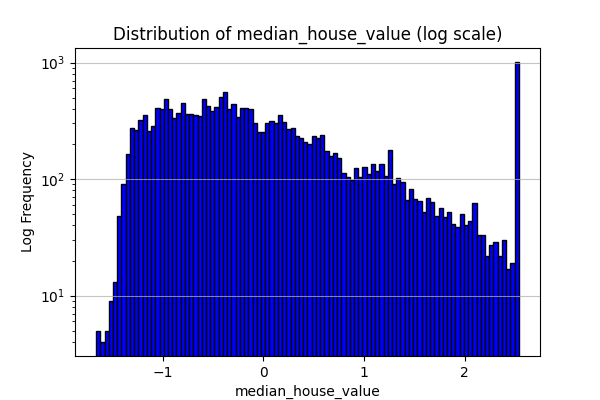

In [31]:
from sklearn.preprocessing import StandardScaler
# StandardScaler obyektini yaratamiz
scaler = StandardScaler()
# Raqamli ustunlarni standartlashtiramiz
df[cols] = scaler.fit_transform(df[cols])
for col in cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=100, color='blue', edgecolor='black', log=True)
    plt.title(f'Distribution of {col} (log scale)')
    plt.xlabel(col)
    plt.ylabel('Log Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### MinMaxScaler

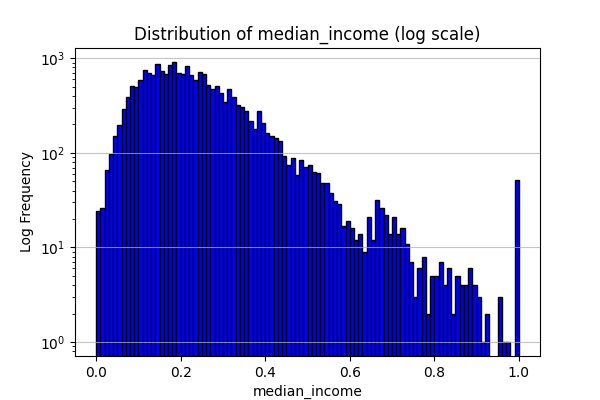

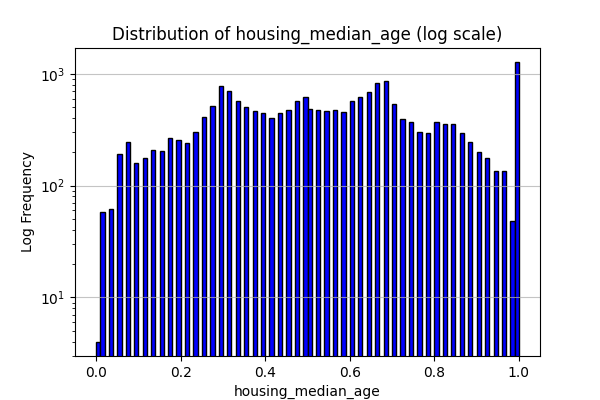

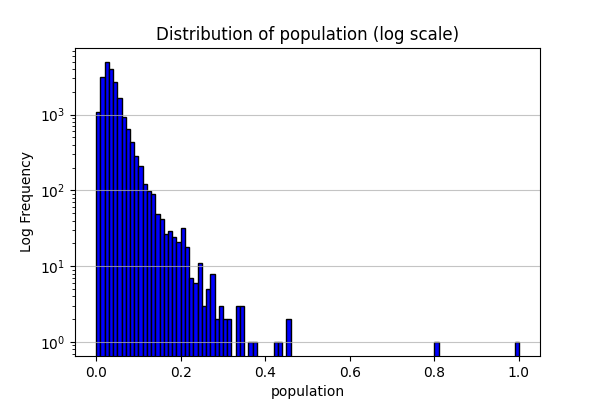

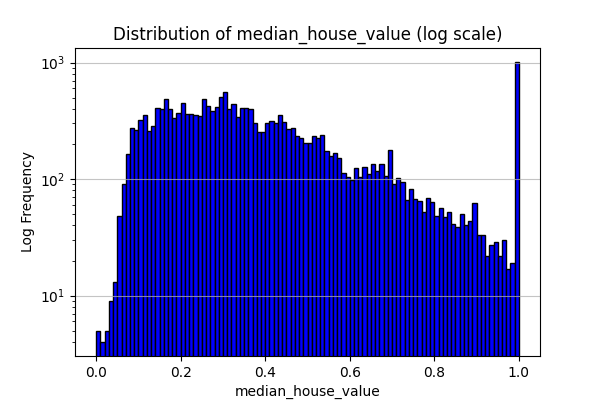

In [32]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler obyektini yaratamiz
minmax_scaler = MinMaxScaler()
# Raqamli ustunlarni Min-Max normalizatsiya qilamiz
df[cols] = minmax_scaler.fit_transform(df[cols])
for col in cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=100, color='blue', edgecolor='black', log=True)
    plt.title(f'Distribution of {col} (log scale)')
    plt.xlabel(col)
    plt.ylabel('Log Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## **Part 5: Optional Feature Engineering**

7. Create meaningful new features:

   * `rooms_per_household = total_rooms / households`
   * `bedrooms_per_room = total_bedrooms / total_rooms`
   * `population_per_household = population / households`

In [34]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,0.784314,880.0,129.0,0.008941,126.0,0.539668,0.902266,NEAR BAY,6.984127,0.146591,0.000071
1,-122.22,37.86,0.392157,7099.0,1106.0,0.067210,1138.0,0.538027,0.708247,NEAR BAY,6.238137,0.155797,0.000059
2,-122.24,37.85,1.000000,1467.0,190.0,0.013818,177.0,0.466028,0.695051,NEAR BAY,8.288136,0.129516,0.000078
3,-122.25,37.85,1.000000,1274.0,235.0,0.015555,219.0,0.354699,0.672783,NEAR BAY,5.817352,0.184458,0.000071
4,-122.25,37.85,1.000000,1627.0,280.0,0.015752,259.0,0.230776,0.674638,NEAR BAY,6.281853,0.172096,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,0.470588,1665.0,374.0,0.023599,330.0,0.073130,0.130105,INLAND,5.045455,0.224625,0.000072
20636,-121.21,39.49,0.333333,697.0,150.0,0.009894,114.0,0.141853,0.128043,INLAND,6.114035,0.215208,0.000087
20637,-121.22,39.43,0.313725,2254.0,485.0,0.028140,433.0,0.082764,0.159383,INLAND,5.205543,0.215173,0.000065
20638,-121.32,39.43,0.333333,1860.0,409.0,0.020684,349.0,0.094295,0.143713,INLAND,5.329513,0.219892,0.000059


1. Display:

   * The first 10 rows.
   * Dataset info using `.info()`.
   * Summary statistics using `.describe()`.
   * Value counts for categorical columns (e.g., `ocean_proximity`).

In [35]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,0.784314,880.0,129.0,0.008941,126.0,0.539668,0.902266,NEAR BAY,6.984127,0.146591,0.000071
1,-122.22,37.86,0.392157,7099.0,1106.0,0.067210,1138.0,0.538027,0.708247,NEAR BAY,6.238137,0.155797,0.000059
2,-122.24,37.85,1.000000,1467.0,190.0,0.013818,177.0,0.466028,0.695051,NEAR BAY,8.288136,0.129516,0.000078
3,-122.25,37.85,1.000000,1274.0,235.0,0.015555,219.0,0.354699,0.672783,NEAR BAY,5.817352,0.184458,0.000071
4,-122.25,37.85,1.000000,1627.0,280.0,0.015752,259.0,0.230776,0.674638,NEAR BAY,6.281853,0.172096,0.000061
5,-122.25,37.85,1.000000,919.0,213.0,0.011491,193.0,0.243921,0.525155,NEAR BAY,4.761658,0.231774,0.000060
6,-122.25,37.84,1.000000,2535.0,489.0,0.030578,514.0,0.217873,0.585979,NEAR BAY,4.931907,0.192899,0.000059
7,-122.25,37.84,1.000000,3104.0,687.0,0.032344,647.0,0.180694,0.466804,NEAR BAY,4.797527,0.221327,0.000050
8,-122.26,37.84,0.803922,2555.0,665.0,0.033717,595.0,0.108998,0.436495,NEAR BAY,4.294118,0.260274,0.000057
9,-122.25,37.84,1.000000,3549.0,707.0,0.043387,714.0,0.220087,0.507423,NEAR BAY,4.970588,0.199211,0.000061


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20640 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  category
 10  rooms_per_household       20640 non-null  float64 
 11  bedrooms_per_room         20640 non-null  float64 
 12  population_per_household  20640 non-null  float64 
dtypes: category(1), float64(12)
memory usage: 1.9 

In [37]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,0.541951,2635.763081,536.838857,0.039869,499.539680,0.232464,0.395579,5.429000,0.213794,0.000086
std,2.003532,2.135952,0.246776,2181.615252,419.391878,0.031740,382.329753,0.131020,0.237928,2.474173,0.065248,0.000291
min,-124.350000,32.540000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.846154,0.037151,0.000000
25%,-121.800000,33.930000,0.333333,1447.750000,297.000000,0.021974,280.000000,0.142308,0.215671,4.440716,0.175225,0.000068
50%,-118.490000,34.260000,0.549020,2127.000000,435.000000,0.032596,409.000000,0.209301,0.339588,5.229129,0.203159,0.000079
75%,-118.010000,37.710000,0.705882,3148.000000,643.250000,0.048264,605.000000,0.292641,0.514897,6.052381,0.240126,0.000092
max,-114.310000,41.950000,1.000000,39320.000000,6445.000000,1.000000,6082.000000,1.000000,1.000000,141.909091,2.824675,0.034834


In [38]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64